# Dark Matter Mass in a distant Galaxy

Galaxies follow a well-modelled distribution of stars and their masses as a function of distance from the galaxy centre. These together create a gravitational potential of the galaxy in which the stars revolve. However, observed stellar revolution rates are in stark disagreement with calculated values. This discrepancy can be attributed to the presence of dark matter halo around the galaxy, which creates a potential that fits with the observed velocities.

Your task in this assignment is to estimate the amount of dark matter in the halo of a distant galaxy, KriGal. 

## Finding the radius-velocity curve

The following file(darkmatter.csv) contains observation data of the stars, a small section of which belong to the galaxy KriGal. Open the file and take a look to get an idea of what observations were made. Such data for stars this far are in practice impossible to measure with such precision, but were made possible for the first time in the history of space observation with KIT (Krittika's Incredible Telescope).

It is known the galaxy's centre has (RA, Dec) = $(140.76398^0, 75.5344^0)$

Open the CSV file, find the relative RA/Dec difference of each star w.r.t. the galaxy's centre and convert all data to SI units - would be handy later on. 


In [1]:
#code
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

deg_to_rad  = (m.pi)/180
arc_y_rad_s = 1.53733409793e-16
gal_cen     = (140.76398,75.5344)
kpc_m       = 3.083e+19

# reading the csv file

df_temp     = pd.read_csv("darkmatter.csv")

# By eyeballing the darkmatter.csv file, we notice that only first 400 stars are closer to the galaxy's center
# compared to the remaining. Suggesting that only the 1st 400 stars belong to that galaxy and the others are
# outliers

df2         = df_temp.head(400)
df2.to_csv("dkm2.csv")
df          = pd.read_csv("dkm2.csv")
# df = pd.read_csv("dkm.csv")
  
# updating the column value/data by taking relative to gal's center and converting them to SI units
for i in range(len(df.index)):
    df.loc[i, 'RA (degrees)']  = deg_to_rad*(df.loc[i, 'RA (degrees)'] - gal_cen[0])
    df.loc[i, 'Dec (degrees)'] = deg_to_rad*(df.loc[i, 'Dec (degrees)'] - gal_cen[1])
    df.loc[i, 'Proper Motion (milliarcseconds/year)'] = arc_y_rad_s*df.loc[i, 'Proper Motion (milliarcseconds/year)']


df.rename(columns = {'RA (degrees)':'rel_RA (rad)', 'Dec (degrees)':'rel_Dec (rad)',
                              'Proper Motion (milliarcseconds/year)':'Proper Motion (rad/sec)'}, inplace = True)
# writing into the file
# df.to_csv("new_darkmatter.csv", index=False)


Assume the galaxy is 3500 kpc (kiloparsecs) away and the centre of galaxy moves according to Hubble's law (H = $70$ km/s/Mpc). Note that the redshift $z$ is related to the radial velocity of any object as

$$ z = \sqrt{\frac{c+v}{c-v}} - 1$$
where $c$ = speed of light, and $v$ = velocity of object, taken positive when object moves away from us.

Also 1 parsec = $3.083 \times 10^{16}$ metres

Using this, find the relative radial velocities of the stars w.r.t. the centre of galaxy.


In [2]:
#code
c=299792458                                                                               # speed of light
v_rad=[]
for i in range(len(df.index)):
    v_rad.append(c*((-1+(1+df.loc[i, 'Redshift'])**2)/(1+(1+df.loc[i, 'Redshift'])**2)))
    
# Calculated the radial velocity of stars using the above mentioned formula and added a new column to the data
# (took relative to the gal's radial velocity ofcourse)

df['rel_rad_vel (km/s)'] = [(x/1000)-245 for x in v_rad]                     # (3500/1000 Mpc)*H = 245 kmps 

Use the previous information to find the tangential velocities of the stars. 

Assume the stars move in perfectly circular orbits and we view the galaxy edge-on i.e. to us the star trajectories appear like line segments.

In [3]:
#code

# tangential velocity can be obtained by multiplying proper motion with distance of the star from the observer
# (which can be approximated as 3500kpc - galaxy's distance)

v_tang=[]
for i in range(len(df.index)):
    v_tang.append(3500*kpc_m*df.loc[i, 'Proper Motion (rad/sec)'])
df['tang_vel (km/s)'] = [x/1000 for x in v_tang]

Now find the angular separation from galaxy centre to each star and use that to find the tangential separation (in length units) from the galaxy centre.

In [4]:
#code

# angular seperation can be calculated by using trigonemtry and some approximations

k=(m.cos(deg_to_rad*75.5344))**2                                                      # dt^2 = d(Dec)^2 + k*d(RA)^2

ang_sep = []
for i in range(len(df.index)):                                                        # true till Row No 401
    ang_sep.append(m.sqrt(((df.loc[i, 'rel_Dec (rad)'])**2) + k*(df.loc[i, 'rel_RA (rad)'])**2))

df['angular separation']=ang_sep

# tangential seperation = angular seperation * distance from the observer

df['tangential seperation (kpc)'] = [3500*x for x in ang_sep] 


Find total velocity of each star w.r.t. galaxy centre.

Using angle information obtained from velocity components (assume circular orbits) and tangential distance, find the radial distance and hence the total distance of each star w.r.t. galaxy centre.

Make a scatter plot of velocity v/s radius.

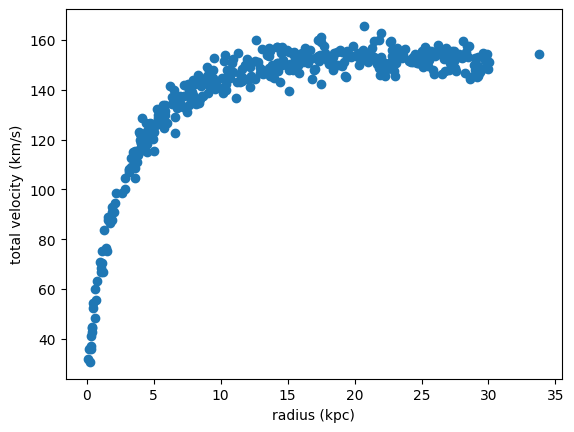

In [5]:
#code

# total_velocity^2 = radial_velocity^2 + tangential_velocity^2

tot_vel = []
for i in range(len(df.index)):                                                        # true till Row No 401
    tot_vel.append(m.sqrt((df.loc[i, 'rel_rad_vel (km/s)'])**2 + (df.loc[i, 'tang_vel (km/s)'])**2))
df['total velocity (km/s)']=tot_vel

# Say the velocity component makes angle phi with the tangential seperation. Then, R*sin(phi) = T [T: tangential
# seperation; R: radius]. sin(phi) = vr/sqrt(vr^2+vt^2) [vr: radial velocity wrt galaxy; vt: tangential velocity]
# => R = T*(sqrt(1 + (vt/vr)^2))

radius = []
for i in range(len(df.index)):                                                        # true till Row No 401
    radius.append(df.loc[i, 'tangential seperation (kpc)']*m.sqrt(1+(df.loc[i, 'tang_vel (km/s)']/df.loc[i, 'rel_rad_vel (km/s)'])**2))
df['radius (kpc)'] = radius

plt.scatter(df['radius (kpc)'], df['total velocity (km/s)'])
plt.xlabel('radius (kpc)')
plt.ylabel('total velocity (km/s)')


df.to_csv("new_darkmatter.csv", index=False)             # Save the obtained data to new_darkmatter.csv

## Finding halo parameters using the curve

If you have got correctly so far, you would have got a set of points that follow what is known as the **galaxy rotation curve**, a curve that rises steeply first, curves and becomes almost constant from around midway. This rotation curve is evidence for the dark matter halo. The halo is taken to be spherical with the centre at galaxy's centre, with radial density profile given by the [Navarro-Frenk-White (NFW) profile](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile):

$$ \rho (r) = \frac{\rho_0}{\frac{r}{R_s}\left( 1 + \frac{r}{R_s}\right)^2} $$

where $R_s$ is a scale radius whose value is comparable to the radius of the galaxy (i.e. same order of magnitude).

From the density profile, find the expression for mass $M_r$ enclosed in a sphere of radius $r$ (you may include it in a handwritten page photo). Using this find the expression for velocity of a star at radius $r$. Recall that 
$$ \frac{v^2}{r} = \frac{GM_r}{r^2} $$

Once you have the velocity profile, using scipy's curve fitting function (google for syntax and uses!) find the best fit value of $R_s$. You are given that the value of $\rho_0$ is $0.02$ solar masses per cubic parsec. Again, convert it to SI units before processing.

In [6]:
#code
rho = .02 * 6.7696e-20                                                                         # kg/m^3
G   = 6.67430e-11

# The below formula can be easily derived by first calculating the mass as a function of radial distance and using
# the formula v = sqrt(G*M/r). mass is calculated by integrating (4/3)*pi*r^3*denisty from 0 to R. We can also
# directly use the result given in wikipedia

def vel(x, Rs):                                                                                # x: kpc; vel: kmps
    return .001*np.sqrt(4*m.pi*rho*G*Rs**2*((np.log(1+(x*kpc_m)/Rs)-((x*kpc_m)/Rs)/(1+(x*kpc_m)/Rs))/((x*kpc_m)/Rs)))

Plot the actual vs curve-fitted plots of velocity and radius. If you have passed only the three required arguments to curve-fit (function name, input and output) you will (likely) notice it doesn't work at all and gives an impossible value for $R_s$! (If you get a good fit in the first try itself, that's great!)

This happens because scipy's initial guess for the parameter is 1 (metre), which is nowhere near the actual value on the order of kiloparsecs. Look up scipy's syntax to see how we can pass in an initial guess ourselves. Now pass on an initial guess (given that you know it's on the order of kiloparsecs) to curve fit. 

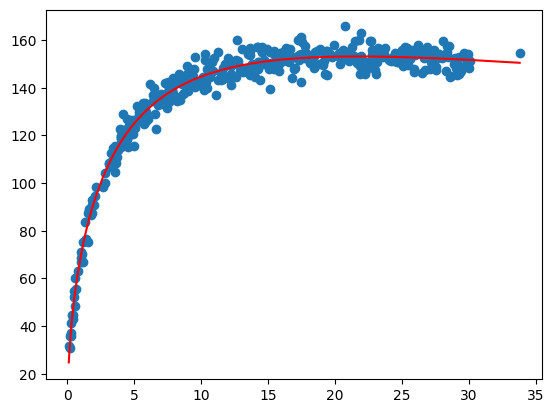

In [7]:
#code
fig = plt.figure()
ax1 = fig.add_subplot(111)

# x=df.iloc[:, 9].values
# y=df.iloc[:, 8].values

# curve_fit from SciPy tunes the parameters of the function to obtain the curve that best fits the data

Rs, Cov = curve_fit(vel, df['radius (kpc)'], np.array(df['total velocity (km/s)']), bounds = (kpc_m, 500*kpc_m))
                                                           # Rs: meters
# print(Rs/kpc_m)

x=df['radius (kpc)'].values
y=vel(x, Rs)
order = np.argsort(x)

# xs and ys are sorted columns of 'radius (kpc)' and 'total velocity (km/s)'

xs = np.array(x)[order]
ys = np.array(y)[order]

# ax1.scatter(df['radius (kpc)'], df['total velocity (km/s)'])


ax1.scatter(df['radius (kpc)'], df['total velocity (km/s)'])
ax1.plot(xs, ys, 'r')
#plt.ylim(0, 180)

plt.show()

Although the dark matter halo nominally has no end, we define the boundary of the halo to be the radius $R_{vir}$ where the **mean** density of the sphere of radius $R_{vir}$ merges with the background density of the Universe. Write a function calculating mean density for a radius $r$, and find the density at $50R_s$.

In [8]:
#code

# mean density can be calculated using mass insdie radius r divided by volume of sphere of radius r.
# We use the mass obtained in previous section here.

def mean_rho(r):                                                                        # r: kpc; mean_rho: kg/m^3
    return 3*rho*((Rs/(r*kpc_m))**3)*((np.log(1+((r*kpc_m)/Rs))) - ((r*kpc_m)/Rs)/(1+((r*kpc_m)/Rs)))

# the below variable stores the value of mean density of the dark matter till 50*Rs

mean_den_50Rs = mean_rho(50*Rs/kpc_m)

# print(mean_den_50Rs)

The background density of the Universe is $8.5 \times 10^{-27}$ in SI units. We take the virial radius to be where mean density of sphere is equal to 50 times background density. Find the value of virial radius at which this happens.

Getting an analytical expression for radius from the mean density equation can be difficult. You can either use a numerical solver like Desmos, or more preferably, tweak around with a few values of radius in the mean density function you wrote till you get a density around 40-60 times the background density. Round off to the nearest multiple of $10R_s$.

In [9]:
#code

# R_vir: virial radius; Initialized to random multiple value of Rs
# back_den: background density of the universe

R_vir = 50*Rs
back_den = 8.5e-27

# By tuning the coefficient in the below print function, we can find the best value of R_vir
# print(mean_rho(28*Rs/kpc_m)/(back_den)) This will print 52.28. Implies R_vir is close to 28*Rs

R_vir = 30*Rs                           # Rounded to nearest multiple of 10*Rs

Using this virial radius, find the total mass contained inside the sphere i.e. the mass of dark matter in the galaxy

In [10]:
#code
kg_solar = 5.02785e-31
mass_dark_matter = mean_rho(R_vir/kpc_m) * (4/3)*(np.pi)*((R_vir)**3)              # mass_dark_matter: kg
print(mass_dark_matter * kg_solar)                                                 # mass of dark matter in solars

[6.22638697e+11]


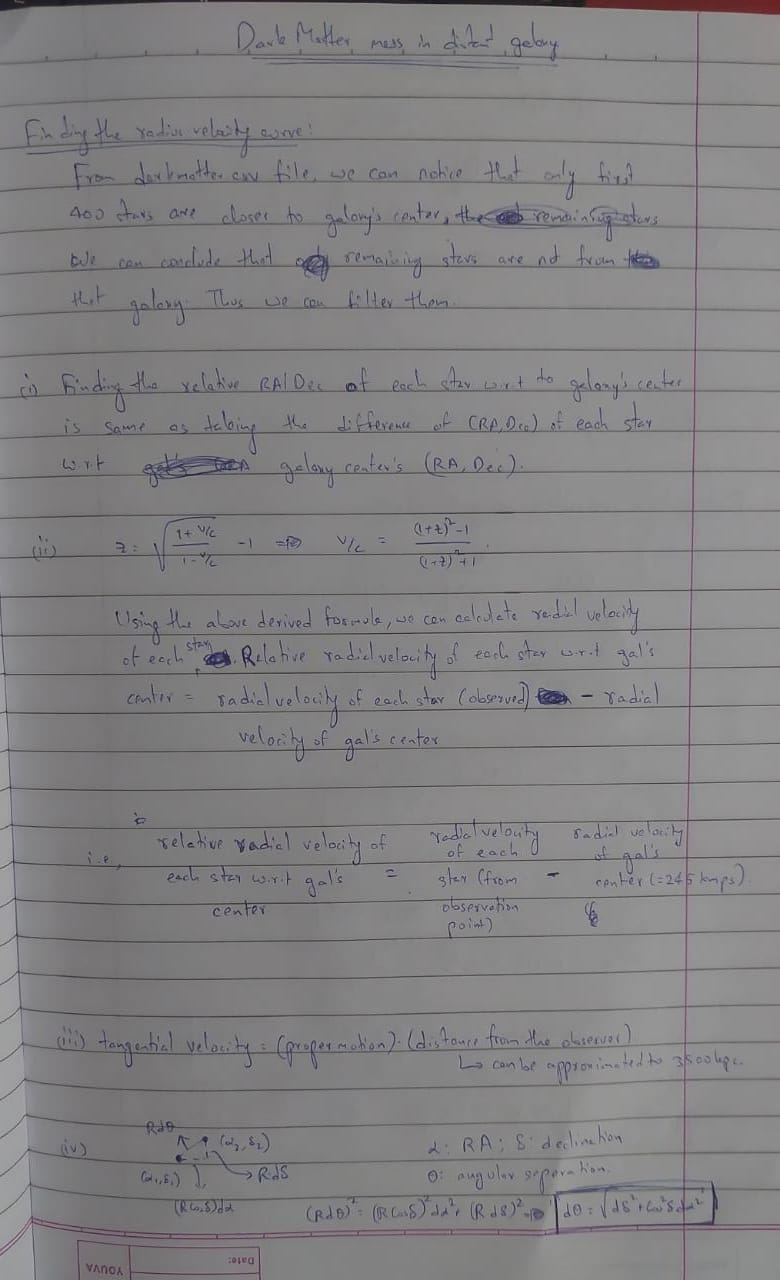

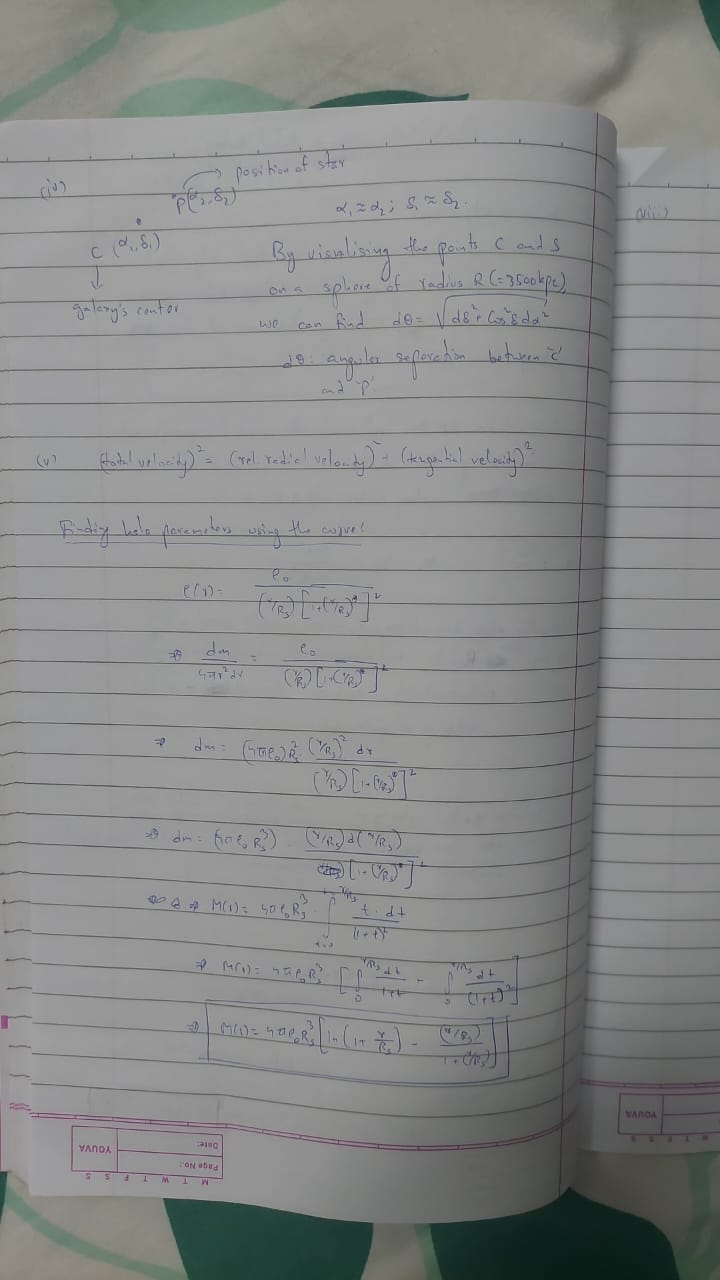

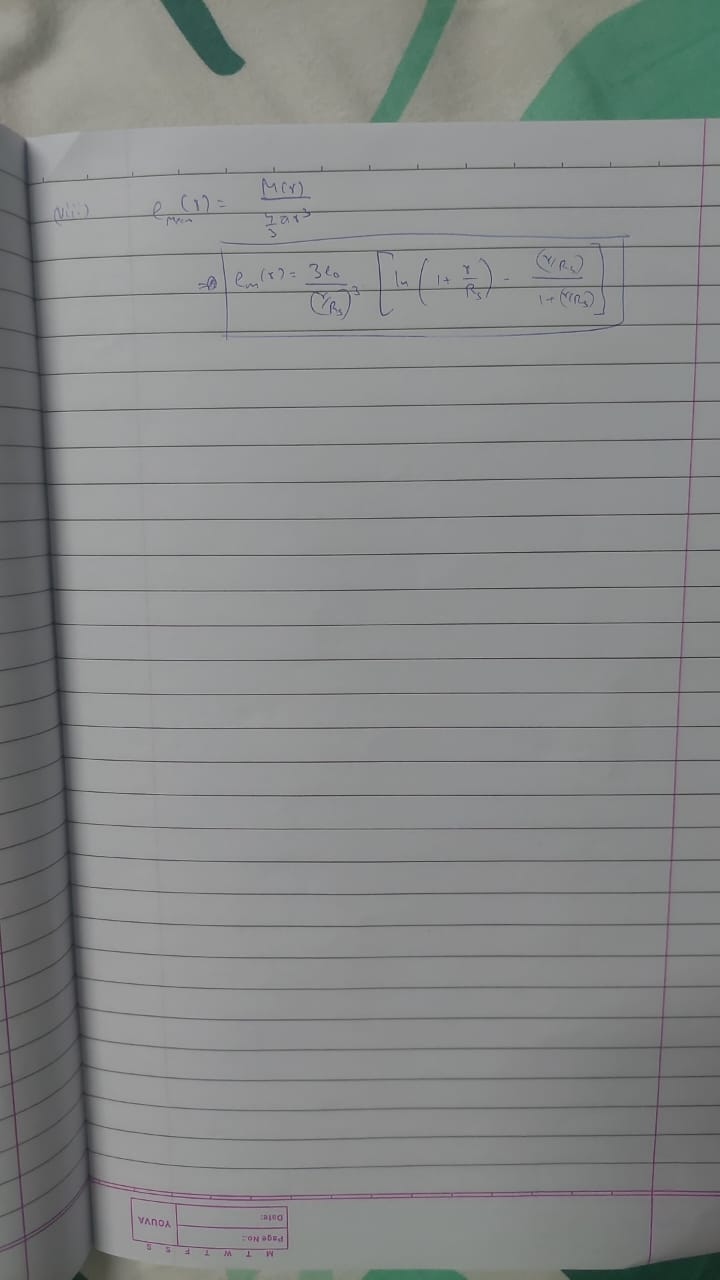